# Predict the Lengths of Stay

### Why is it important to predict the lengths of Stay (LOS)?
- A metric for provider reimbursement and healthcare quality .
- Hospital care costs make up 1/3 of US health spending <sup>1
- Medicare reimbursement, the Inpatient Prospective Payment System Rule (IPPS), determines payments by case, not days of stay. Thus, hospitals would like to identify patients with high LOS risk.
-  In 126 counties, the average hospital is at least 90% occupied, according to an analysis of the data by the COVID-19 Hospitalization Tracking Project <sup>2
- Help with the logistics of the hospital: optimizing patient flow, minimal waiting, minimal exposure to risks associated with hospitalization, and efficient use of resources such as hospital beds, medical equipment and available clinical staff.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("train_data.csv")
df.duplicated().sum()

0

In [3]:
df.set_index('case_id',inplace=True)

In [5]:
#Missing values
df.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

## Exploring the data

In [4]:
le=preprocessing.LabelEncoder()
df['Stay']=le.fit_transform(df['Stay'])
map_stay = dict(zip(le.classes_, range(len(le.classes_))))

In [54]:
stays=df.groupby('Stay').size()

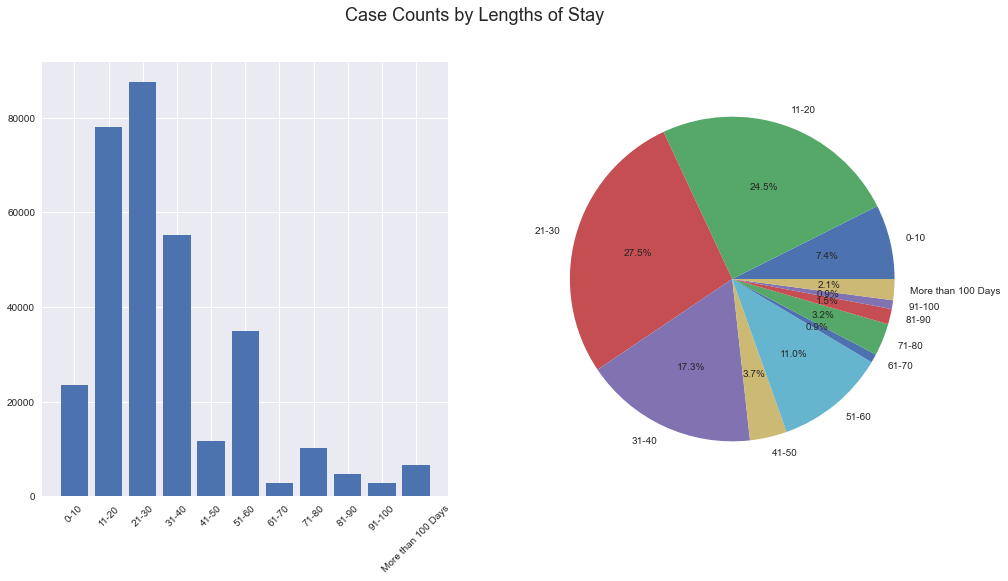

In [155]:

fig, [ax1,ax2] =plt.subplots(nrows=1,ncols=2,figsize=(16,8))
plt.style.use('seaborn')
fig.text(0.5, 0.975, 'Case Counts by Lengths of Stay',
         horizontalalignment='center',
         verticalalignment='top',fontsize=18)
ax1.bar(map_stay.keys(),stays)
ax1.set_xticklabels(map_stay.keys(),rotation=45)
ax2.pie(stays,autopct='%1.1f%%',labels=map_stay.keys())
plt.show()

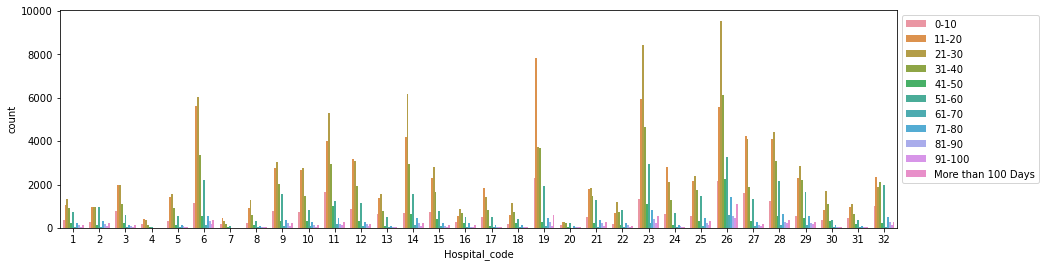

In [230]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Hospital_code', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

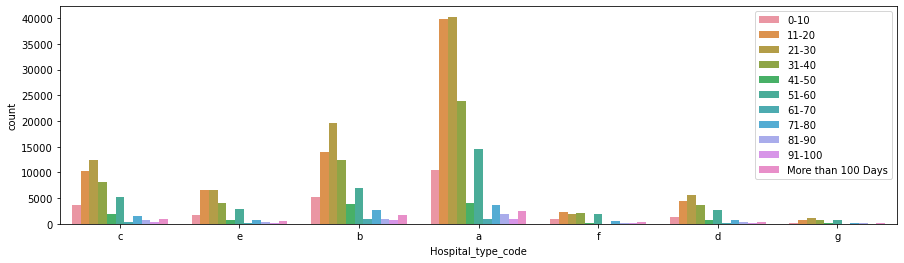

In [232]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Hospital_type_code', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

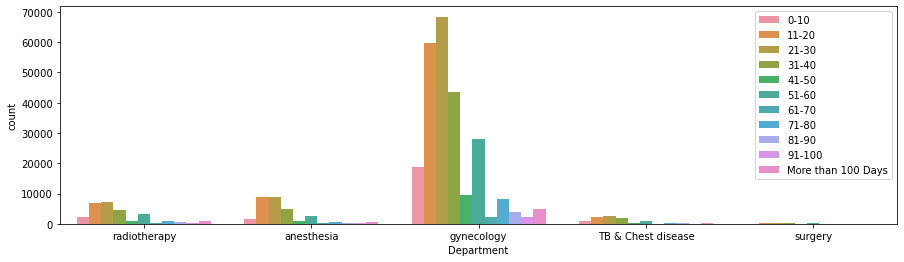

In [233]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Department', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

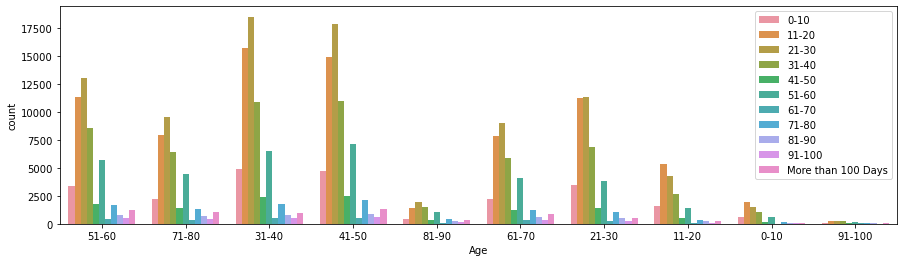

In [234]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Age', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

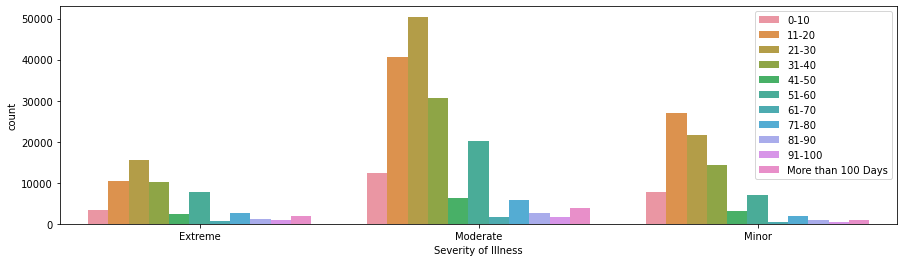

In [235]:
plt.subplots(figsize=(15,4))
g=sns.countplot(x='Severity of Illness', hue='Stay', data=df)
legend_labels, _= g.get_legend_handles_labels()
g.legend(legend_labels, map_stay.keys(), bbox_to_anchor=(1,1))
plt.show();

In [254]:
%%html
<div class='tableauPlaceholder' id='viz1610602132215' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;LO&#47;LOS_16106021139880&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='LOS_16106021139880&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;LO&#47;LOS_16106021139880&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610602132215');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Data Wranggling

In [75]:
df.dtypes

Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                   int64
dtype: object

### Change categorical variables into ordinal numeric values

In [76]:
le=preprocessing.LabelEncoder()

In [5]:
#Hospital_type
df['Hospital_type_code']=le.fit_transform(df['Hospital_type_code'])
map_hospital_type = dict(zip(le.classes_, range(len(le.classes_))))

In [6]:
#Hospital_region_code
df['Hospital_region_code']=le.fit_transform(df['Hospital_region_code'])
map_hospital_region = dict(zip(le.classes_, range(len(le.classes_))))

In [7]:
#Department
df['Department']=le.fit_transform(df['Department'])
map_department = dict(zip(le.classes_, range(len(le.classes_))))

In [8]:
#Ward_Type
df['Ward_Type']=le.fit_transform(df['Ward_Type'])
map_ward = dict(zip(le.classes_, range(len(le.classes_))))

In [13]:
#Ward_Facility_Code
df['Ward_Facility_Code']=le.fit_transform(df['Ward_Facility_Code'])
map_ward_facility = dict(zip(le.classes_, range(len(le.classes_))))

In [9]:
#Type of Admission
df['Type of Admission']=le.fit_transform(df['Type of Admission'])
map_admission = dict(zip(le.classes_, range(len(le.classes_))))

In [10]:
#Severity of Illness
df['Severity of Illness']=le.fit_transform(df['Severity of Illness'])
map_severity = dict(zip(le.classes_, range(len(le.classes_))))

In [11]:
#Age
df['Age']=le.fit_transform(df['Age'])
map_age = dict(zip(le.classes_, range(len(le.classes_))))

In [86]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


## Baseline model: decision tree classifier

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [15]:
y=df["Stay"]
X=df.loc[:,df.columns!='Stay']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [108]:
impute=SimpleImputer()
dt=DecisionTreeClassifier()
pipe=Pipeline([("impute",impute),("dt",dt)])
parameters={"impute__strategy":['mean','median','most_frequent'],"dt__max_depth":range(1,20),"dt__min_samples_leaf":range(1,20)}
GridSearchCV(pipe,parameters).fit(X_train,y_train).best_estimator_


Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('dt',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=17))])

In [17]:
model=Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('dt',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=17))])
model.fit(X_train,y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('dt',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=17))])

In [17]:
dtpred=model.predict(X_test)
print(classification_report(y_test, dtpred,digits=3))

              precision    recall  f1-score   support

           0      0.390     0.141     0.207      4761
           1      0.421     0.414     0.418     15654
           2      0.408     0.706     0.517     17480
           3      0.390     0.252     0.306     10973
           4      0.000     0.000     0.000      2377
           5      0.400     0.448     0.422      6943
           6      0.000     0.000     0.000       559
           7      0.250     0.015     0.028      2058
           8      0.354     0.124     0.184      1014
           9      0.081     0.006     0.010       540
          10      0.538     0.375     0.442      1329

    accuracy                          0.409     63688
   macro avg      0.294     0.225     0.230     63688
weighted avg      0.381     0.409     0.372     63688



In [33]:
map_stay

{'0-10': 0,
 '11-20': 1,
 '21-30': 2,
 '31-40': 3,
 '41-50': 4,
 '51-60': 5,
 '61-70': 6,
 '71-80': 7,
 '81-90': 8,
 '91-100': 9,
 'More than 100 Days': 10}

In [28]:
model.predict([[np.nan,np.nan,np.nan,np.nan,np.nan,3,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,5,np.nan]])

array([2])

### Random Forest

In [125]:
rf=RandomForestClassifier(random_state=0)
impute=SimpleImputer()
param={"impute__strategy":['mean','median','most_frequent'],"rf__max_depth":range(1,20)}
pipe=Pipeline([('impute',impute),("rf",rf)])
GridSearchCV(pipe,param).fit(X_train,y_train).best_estimator_

Pipeline(steps=[('impute', SimpleImputer()),
                ('rf', RandomForestClassifier(max_depth=16, random_state=0))])

In [31]:
rfclassifier=Pipeline(steps=[('impute', SimpleImputer()),
                ('rf', RandomForestClassifier(max_depth=16, random_state=0,n_estimators=60))])
rfclassifier.fit(X_train,y_train)
rfpred=rfclassifier.predict(X_test)

In [32]:
rfclassifier.predict([[np.nan,np.nan,np.nan,np.nan,np.nan,3,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,5,np.nan]])

array([2])

In [19]:
print(classification_report(y_test, rfpred, digits=3))

              precision    recall  f1-score   support

           0      0.431     0.134     0.204      4761
           1      0.423     0.495     0.456     15654
           2      0.420     0.663     0.514     17480
           3      0.421     0.235     0.302     10973
           4      0.200     0.001     0.003      2377
           5      0.404     0.502     0.447      6943
           6      0.667     0.004     0.007       559
           7      0.398     0.022     0.041      2058
           8      0.414     0.130     0.198      1014
           9      0.583     0.013     0.025       540
          10      0.550     0.436     0.487      1329

    accuracy                          0.421     63688
   macro avg      0.446     0.240     0.244     63688
weighted avg      0.417     0.421     0.384     63688



In [135]:
importances=rfclassifier.steps[1][1].feature_importances_

In [136]:
features=['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit']

In [137]:
feature_importances=dict(zip(features,importances))
a=dict(sorted(feature_importances.items(), key=lambda x: x[1]))

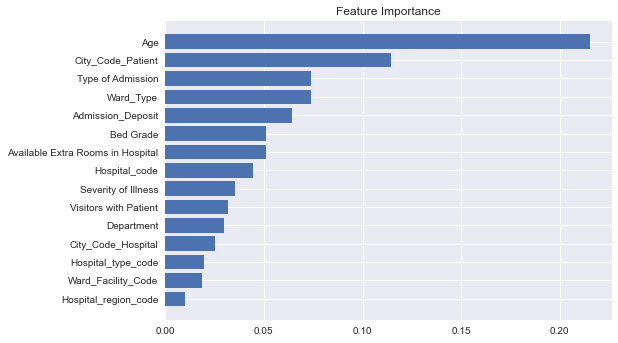

In [138]:
fi_plot=plt.barh(list(a.keys()),list(a.values()))
plt.title("Feature Importance")
plt.show()

### Boosting Algorithm

In [144]:
import xgboost as xgb

In [165]:
impute=SimpleImputer()
boost=xgb.XGBClassifier(objective='multi:softmax', n_estimators=40,random_state=0,use_label_encoder=False,verbosity=0)
pipe=Pipeline([('impute',impute),("boost",boost)])
param={"impute__strategy":["mean","median","most_freqeunt"],"boost__max_depth":range(1,20)}
#GridSearchCV(pipe,param).fit(X_train,y_train).best_estimator_

In [34]:
pipe=Pipeline([('impute',impute),("boost",xgb.XGBClassifier(n_estimators=60,random_state=0,use_label_encoder=False,verbosity=0,max_depth=5))])
pipe.fit(X_train,y_train)
xgbpred=pipe.predict(X_test)

NameError: name 'impute' is not defined

In [172]:
print(classification_report(y_test, xgbpred,digits=3))

              precision    recall  f1-score   support

           0      0.422     0.140     0.210      4761
           1      0.425     0.504     0.461     15654
           2      0.423     0.664     0.517     17480
           3      0.420     0.217     0.286     10973
           4      0.214     0.001     0.003      2377
           5      0.396     0.502     0.442      6943
           6      0.200     0.002     0.004       559
           7      0.259     0.011     0.021      2058
           8      0.358     0.169     0.229      1014
           9      0.294     0.009     0.018       540
          10      0.531     0.424     0.471      1329

    accuracy                          0.421     63688
   macro avg      0.358     0.240     0.242     63688
weighted avg      0.405     0.421     0.383     63688



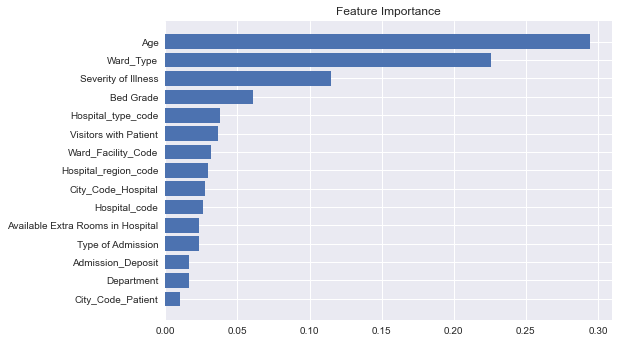

In [174]:
xgimportances=pipe.steps[1][1].feature_importances_
xgfeature_importances=dict(zip(features,xgimportances))
a=dict(sorted(xgfeature_importances.items(), key=lambda x: x[1]))
fi_plot=plt.barh(list(a.keys()),list(a.values()))
plt.title("Feature Importance")
plt.show()

## Binary Predictor

In [17]:
df["Bed Grade"].replace(np.nan, 2.0, inplace=True)
df["City_Code_Patient"].replace(np.nan, 8.0, inplace=True)
df=df.drop('patientid',axis=1)

### longer than a month

In [35]:
df['lm']=0
df.loc[df['Stay']>2,'lm']=1

In [36]:
y=df["lm"]
X=df.loc[:,df.columns!='Stay']
X=X.loc[:,X.columns!='lm']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [20]:
rf=RandomForestClassifier(random_state=0,max_depth=18,n_estimators=60)


In [ ]:
ExplainerDashboard(ClassifierExplainer(rf.fit(X_train, y_train), X_test, y_test)).run()

Note: shap=='guess' so guessing for RandomForestClassifier shap='tree'...
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...


In [37]:
model=Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('dt',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=17))])
model.fit(X_train,y_train)

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('dt',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=17))])

In [37]:
dtpred=model.predict(X_test)
print(classification_report(y_test, dtpred,digits=3))

              precision    recall  f1-score   support

           0      0.763     0.946     0.845     37895
           1      0.877     0.568     0.690     25793

    accuracy                          0.793     63688
   macro avg      0.820     0.757     0.767     63688
weighted avg      0.809     0.793     0.782     63688



In [38]:
rf=RandomForestClassifier(random_state=0)
impute=SimpleImputer()
param={"impute__strategy":['mean','median','most_frequent'],"rf__max_depth":range(1,20)}
pipe=Pipeline([('impute',impute),("rf",rf)])
GridSearchCV(pipe,param).fit(X_train,y_train).best_estimator_

Pipeline(steps=[('impute', SimpleImputer()),
                ('rf', RandomForestClassifier(max_depth=18, random_state=0))])

In [38]:
rfclassifier=Pipeline(steps=[('impute', SimpleImputer()),
                ('rf', RandomForestClassifier(max_depth=18, random_state=0,n_estimators=60))])
rfclassifier.fit(X_train,y_train)
rfpred=rfclassifier.predict(X_test)

In [39]:
rfclassifier.predict([[np.nan,np.nan,np.nan,np.nan,np.nan,3,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,0,np.nan,5,np.nan]])

array([0])

In [40]:
print(classification_report(y_test, rfpred, digits=3))

              precision    recall  f1-score   support

           0      0.768     0.943     0.846     37895
           1      0.874     0.581     0.698     25793

    accuracy                          0.796     63688
   macro avg      0.821     0.762     0.772     63688
weighted avg      0.811     0.796     0.786     63688



## References
1. https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/Downloads/highlights.pdf
2. https://www.npr.org/sections/health-shots/2020/12/07/944021201/new-covid-19-data-release-shows-where-hospitals-around-the-country-are-filling-u

In [2]:
%%html
<div class='tableauPlaceholder' id='viz1613422800906' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Predictor_LOS&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Predictor_LOS&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Predictor_LOS&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1613422800906');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>